本プログラムはDAI(@never_be_a_pm) さんの以下サイトのプログラムをベースに作成したものとなります。
公開にあたっては、DAIさんの許可を得ております。本プログラムの二次使用に関してはDAIさんに確認下さい（私への確認は不要です）

https://review-of-my-life.blogspot.jp/2017/10/python-web-scraping-data-collection-analysis.html

Python及び使用しているライブラリのバージョンの確認

In [1]:
import platform
print("python " + platform.python_version())
import pkg_resources
pkglist = ['selenium', 'pandas', 'numpy', 'matplotlib']
for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

python 3.6.1
matplotlib 2.0.2
numpy 1.12.1
pandas 0.20.1
selenium 3.8.0


必要ライブラリのインポート

In [2]:
from selenium import webdriver  
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

ベースになるcsvファイル作成

In [3]:
%%bash
echo "title,date,bookmarks" > trend.csv

スクレイピングのメインスクリプト

In [4]:
# Access to page
browser = webdriver.PhantomJS()  # DO NOT FORGET to set path
url = "http://b.hatena.ne.jp/search/text?q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1"
browser.get(url)
df = pd.read_csv('trend.csv', index_col=0)

page = 1 #This number shows the number of current page later

while True: #continue until getting the last page
    print(len(browser.find_elements_by_css_selector(".pager-next")))
    if len(browser.find_elements_by_css_selector(".pager-next")) > 0:
        print("######################page: {} ########################".format(page))
        print("Starting to get posts...")
        #get all posts in a page
        posts = browser.find_elements_by_css_selector(".search-result")
        for post in posts:
            title = post.find_element_by_css_selector("h3").text
            date = post.find_element_by_css_selector(".created").text
            bookmarks = post.find_element_by_css_selector(".users span").text
            se = pd.Series([title, date, bookmarks],['title','date','bookmarks'])
            print(title + " " + date + " bookmarks=" + bookmarks)
            df = df.append(se, ignore_index=True)

        #after getting all posts in a page, click pager next and then get next all posts again

        btn = browser.find_element_by_css_selector("a.pager-next").get_attribute("href")
        print("next url:{}".format(btn))
        browser.get(btn)
        page+=1
        browser.implicitly_wait(10)
        print("Moving to next page......")
        time.sleep(10)
    else: #if no pager exist, stop.
        print("no pager exist anymore")
        break
df.to_csv("trend1.csv")
print("DONE")

1
######################page: 1 ########################
Starting to get posts...
  bookmarks=
2017年の出来事を振り返って2018年の野望を語る - karaage. [からあげ] 2018/01/01 bookmarks=2
コードレス掃除機「Electrolux」新型に買い換えたら使い心地が進化して... 2017/12/31 bookmarks=2
Pythonで最初に知っておきたかったことのまとめ【初心者向け】 - karaag... 2017/12/27 bookmarks=775
Raspberry Piに最適な小型ディスプレイ「Quimat 3.5インチタッチスクリ... 2017/12/25 bookmarks=17
横浜中華街でiPhoneアプリ「HUJI Cam」でフィルムっぽい日付入り写真を... 2017/12/22 bookmarks=28
【Python】マルコフ連鎖を使ってみる | chat-blog 2017/12/18 bookmarks=1
ディープラーニングを使ってドット絵を画像に変換してみた - karaage. [... 2017/12/18 bookmarks=51
学生・メイカー無料の高機能3D CAD「Fusion360」のセットアップ方法と初... 2017/12/15 bookmarks=4
三重県のディープな屋台ラーメン屋「長崎屋」のチャーシューメンが最高... 2017/12/13 bookmarks=3
2017年にAmazonで買った素敵な作品を紹介します（書籍・音楽編） - kara... 2017/12/11 bookmarks=5
マイクロフォーサーズマウントのトイレンズで白鳥庭園の紅葉を撮影して... 2017/12/08 bookmarks=16
Raspberry Pi専用の良い感じの小型アクティブスピーカを部品費770円（送... 2017/12/06 bookmarks=8
12月5日のほっとな話題 - 今日の話題 2017/12/05 bookmarks=1
2017年にAmazonで買った最高なやつらを紹介するぜ！（家電・生活用品編... 2017/12/04 bookmarks=340
ピ

Moving to next page......
1
######################page: 4 ########################
Starting to get posts...
  bookmarks=
無料の仮想化環境構築ソフト「VirtualBox」を使ってMacでLinux（Ubuntu... 2017/03/30 bookmarks=5
家に眠っていたApple TVとオーディオ機器を組み合わせてホームシアター... 2017/03/27 bookmarks=10
Synology社の最新のNAS（DiskStation DS216j）に買い換えたら今まで自分... 2017/03/23 bookmarks=440
ROS(Robot Operating System)について調べてみよう - Qiita 2017/03/21 bookmarks=1
オリンパスの中望遠単焦点レンズの名機 M.ZUIKO DIGITAL 45mm F1.8 1本... 2017/03/20 bookmarks=4
マルチプラットフォームに対応した無料RAW現像ソフト「RawTherapee」と... 2017/03/15 bookmarks=12
Ｙモード メモログ:【忘備録】イベント出展時の持ち物リスト 2017/03/13 bookmarks=1
三重のみそカツ発祥のお店「カトレア」で食べたみそカツがとても美味し... 2017/03/13 bookmarks=6
ラグーナテンボスの「映画ドラえもん 南極カチコチ大冒険」でドラえもん... 2017/03/09 bookmarks=7
動画からスリットスキャン写真を自動生成する画像処理ソフト「Slit Scan... 2017/03/06 bookmarks=7
自宅IoTのため家にある電子機器をRaspberry Pi+Homebridge使ってSiriの... 2017/03/02 bookmarks=465
ブロガーよ！これがブログ狂だ！（レンタカー借りてうなぎ食べてチュー... 2017/02/27 bookmarks=19
Ogaki Mini Maker Faire非公式出展マニュアル2016年度版 - karaage. [か... 2017/02/24 bookmarks

娘の1歳のバースデイフォトを山手フォトスタジオさんで撮影しました - k... 2016/06/22 bookmarks=22
ROS(Robot Operating System)関係の日本語の書籍・サイト - karaage. [... 2016/06/20 bookmarks=6
Raspberry pi jessieにwatchdogをインストール – 国際電話のかけ方|国... 2016/06/17 bookmarks=1
あの美味しんぼがディスったお店「海員閣」の牛ばらそばが激ウマでした ... 2016/06/17 bookmarks=9
四日市工場夜景やり過ぎRAW現像 - karaage. [からあげ] 2016/06/15 bookmarks=32
next url:http://b.hatena.ne.jp/search/text?safe=on&q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1&of=240
Moving to next page......
1
######################page: 7 ########################
Starting to get posts...
  bookmarks=
子供のフォトアルバムの写真に日付を入れると良い感じ - karaage. [から... 2016/06/03 bookmarks=9
カメラのセンササイズとレンズの焦点距離と画角の関係をまとめてみた - ... 2016/06/02 bookmarks=32
「電波ガーデニング」による家庭菜園進捗報告 - karaage. [からあげ] 2016/06/01 bookmarks=10
Macにインストールしている無料ソフトまとめ - karaage. [からあげ] 2016/05/31 bookmarks=5
Kindleで森博嗣先生のエッセイばかり読んでます - karaage. [からあげ] 2016/05/30 bookmarks=4
エンジニアにオススメのiPhoneアプリ - karaage. [からあげ] 2016/05/29 bookmarks=4
民俗学・考古学を題材にした漫画を夜な夜な読んでいます - karaage. [か... 20

マイナンバーっぽい12桁の乱数をツイートするWebアプリ「マイナソバ」で... 2015/11/25 bookmarks=11
今年買って良かった写真の幅を広げてくれる3つのモノ - karaage. [から... 2015/11/24 bookmarks=22
Raspberry Pi(volumio)ミュージックサーバに曲を保存して再生する方法 -... 2015/11/24 bookmarks=3
幻想的なカラー赤外線写真（東京散歩編） - karaage. [からあげ] 2015/11/22 bookmarks=17
スマートフォンからリモート操作できるRaspberry Piデジカメ「RaspicamW... 2015/11/20 bookmarks=16
吉良ワイキキビーチでお散歩写真 - karaage. [からあげ] 2015/11/19 bookmarks=1
東京 お散歩FakeHDR写真 - karaage. [からあげ] 2015/11/18 bookmarks=19
読破したRaspberry Pi関連オススメ書籍紹介 - karaage. [からあげ] 2015/11/17 bookmarks=8
next url:http://b.hatena.ne.jp/search/text?safe=on&q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1&of=360
Moving to next page......
1
######################page: 10 ########################
Starting to get posts...
  bookmarks=
自作Raspberry Pi赤外線カメラでカラー赤外線写真　 - karaage. [からあ... 2015/11/15 bookmarks=107
Raspberry Pi カメラモジュールでRAWデータ生成 - karaage. [からあげ] 2015/11/13 bookmarks=4
吉良観光ホテルのスロープカーで絶景の露天風呂堪能 - karaage. [からあ... 2015/11/12 bookmarks=9
iPhoneの7GB制限に2度と引っかからないためにデータ分析と対策 -

デジタルフィルムスワップで一人多重露光をやってみる - karaage. [から... 2015/05/24 bookmarks=19
Flickrの自動分類機能「Magic View」がすごい - karaage. [からあげ] 2015/05/23 bookmarks=4
からあげ氏怒りのからあげレビュ 〜唐揚げにお酢をかけるの巻〜 - karaa... 2015/05/22 bookmarks=16
森 博嗣先生の描く武士道 - karaage. [からあげ] 2015/05/21 bookmarks=1
ウェアラブルデバイスを自作してみる「TWE-Lite Setup編」 - karaage. [... 2015/05/20 bookmarks=5
Raspberry Pi 2でロボット製作（環境設定編） - karaage. [からあげ] 2015/05/18 bookmarks=1
Raspberry Pi 2でロボット製作（構想・準備編） - karaage. [からあげ] 2015/05/14 bookmarks=24
NATURA CLASSICA + LOMO 100 フィルム写真 - karaage. [からあげ] 2015/05/09 bookmarks=2
ホロスペックメガネで光から絵が飛び出る不思議な写真撮影にチャレンジ ... 2015/05/08 bookmarks=1
Raspberry Pi 2をセットアップしてみました - karaage. [からあげ] 2015/05/07 bookmarks=3
next url:http://b.hatena.ne.jp/search/text?safe=on&q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1&of=480
Moving to next page......
1
######################page: 13 ########################
Starting to get posts...
  bookmarks=
OS X YosemiteでApertureとiPhotoが起動しないバグの解決方法 - karaage... 2015/05/04 bookmarks=4
謎の巨大大仏 布袋大仏を

自作デジカメ制作 【機能拡張編その1】メニューとエフェクトをつけてみ... 2014/10/14 bookmarks=9
iPhone6Plusで撮ったタイムラプス＆スーパースローモーション動画 - kar... 2014/10/13 bookmarks=12
「WALKtan@NAGOYA vol.3」に参加しました - karaage. [からあげ] 2014/10/13 bookmarks=3
フィルム写真で振り返る夏のおもひで - karaage. [からあげ] 2014/10/08 bookmarks=1
フィルム写真で切り取る日常 - karaage. [からあげ] 2014/10/06 bookmarks=5
SHUTTER HOLICさんでiPhone6Plus用の理想のハンギングケース購入しまし... 2014/10/05 bookmarks=10
自作デジカメ制作 【ソフトウェア編その4】デジカメとりあえず完成 - ka... 2014/10/03 bookmarks=15
iPhone6Plusでかくて使いにくい！すぐ曲がる！的な記事が読みたいんだろ... 2014/09/30 bookmarks=1
ろん誕のために妻がロンスタ・モンヂャック・みそメンクッキー作りまし... 2014/09/29 bookmarks=2
next url:http://b.hatena.ne.jp/search/text?safe=on&q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1&of=600
Moving to next page......
1
######################page: 16 ########################
Starting to get posts...
  bookmarks=
iPhone6Plusのバッテリ劣化を防止するため古いミニノートをタイマーコン... 2014/09/27 bookmarks=2
自作デジカメ制作 【ソフトウェア編その2】 ディスプレイに絵・文字・写... 2014/09/23 bookmarks=13
iPhone6か6Plusで迷っていたけど少年ジャンプ＋が電子版少年ジャンプ配... 2014/09/22 bookmark

Picasaの「I'm Feeling Lucky」機能が凄い - KARAAGE‼[からあげに勝手... 2011/04/27 bookmarks=1
Macで回路シミュレーション 〜MikuInstaller万歳〜 - KARAAGE‼[からあ... 2010/10/18 bookmarks=5
大人の科学の付録8bitマイコン「Japanino」とデジタル一眼レフを使って... 2010/09/03 bookmarks=5
「けいおん！」の影響でフジロックに行った隠れヲタがフジロック2010の... 2010/08/03 bookmarks=11
Olympus E-P1で撮ったハワイの写真約1000枚（8GB）を60枚（30MB）にまと... 2010/05/03 bookmarks=1
このWEB漫画がすごい 2009 - KARAAGE。[からあげは28歳になってしまいま... 2010/04/03 bookmarks=2
名古屋-東京-名古屋一日の旅行で撮った1GBの写真を2分40秒の動画に変換 ... 2010/04/02 bookmarks=1
このWEB漫画がすごい 2010 - KARAAGE。[からあげは28歳になってしまいま... 2010/04/01 bookmarks=39
書籍の電子化始めました - KARAAGE。[からあげは28歳になってしまいまし... 2010/01/27 bookmarks=1
凧につけた改造デジカメで空撮に挑戦してみた 第1回 - KARAAGE。[からあ... 2009/12/02 bookmarks=1
next url:http://b.hatena.ne.jp/search/text?safe=on&q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1&of=720
Moving to next page......
0
no pager exist anymore
DONE


気になれば以下を手動で編集
- 何故か1個目のデータだけ読み込めないので、手動で`trend1.csv`に書き込む  
- 他のサイトの記事を手動で削除

データを読み込んで整形する

In [7]:
df = pd.read_csv("trend1.csv")
data = df.drop("Unnamed: 0", axis = 1)
data = data.drop(0)
data.head()

,date,bookmarks,title
1,2017/12/31,2.0,コードレス掃除機「Electrolux」新型に買い換えたら使い心地が進化して...
2,2017/12/27,775.0,Pythonで最初に知っておきたかったことのまとめ【初心者向け】 - karaag...
3,2017/12/25,17.0,Raspberry Piに最適な小型ディスプレイ「Quimat 3.5インチタッチスクリ...
4,2017/12/22,28.0,横浜中華街でiPhoneアプリ「HUJI Cam」でフィルムっぽい日付入り写真を...
5,2017/12/18,1.0,【Python】マルコフ連鎖を使ってみる | chat-blog


ブックマークの多い順にソートする

In [8]:
sort_data = data.sort_values(by=["bookmarks"], ascending=False)
sort_data.head()

,date,bookmarks,title
2,2017/12/27,775.0,Pythonで最初に知っておきたかったことのまとめ【初心者向け】 - karaag...
145,2017/01/25,768.0,収納下手を克服するため妻監修のもと無印良品中心に理想の収納システム...
98,2017/06/06,574.0,Amazon DashボタンをHackして、妻を助けるためのIoTデバイス「からあげD...
130,2017/03/02,465.0,自宅IoTのため家にある電子機器をRaspberry Pi+Homebridge使ってSir...
187,2016/10/10,442.0,私たちは正しくGet Wild出来ていたのだろうか？CITY HUNTER シーズン1全...


ブックマークの年毎の比較

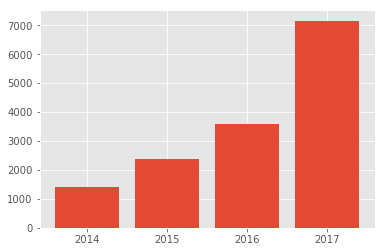

In [11]:
plt.style.use('ggplot')
year2017 = data[data["date"].str.contains("2017/", na=False)]
year2016 = data[data["date"].str.contains("2016/", na=False)]
year2015 = data[data["date"].str.contains("2015/", na=False)]
year2014 = data[data["date"].str.contains("2014/", na=False)]
bm_2017 = year2017["bookmarks"].sum()
bm_2016 = year2016["bookmarks"].sum()
bm_2015 = year2015["bookmarks"].sum()
bm_2014 = year2014["bookmarks"].sum()

left = np.array([1, 2, 3, 4])
label = ["2014", "2015", "2016", "2017"]
height = np.array([bm_2014, bm_2015, bm_2016, bm_2017])
plt.bar(left, height, tick_label=label, align="center")
plt.show()

ブックマークのヒストグラム

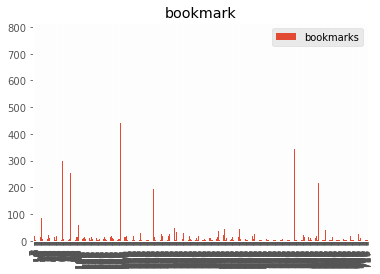

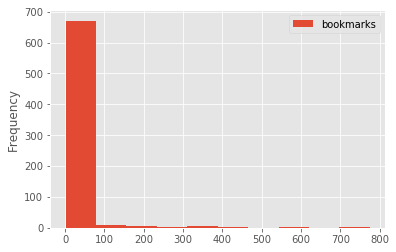

In [10]:
df_bm = data.iloc[:, [1]]
df_bm.plot.bar()
plt.title('bookmark')
df_bm.plot(kind='hist')
plt.show()